In [27]:
import matplotlib
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## utility functions

In [52]:
def show_cloud(points_plt, elev=30, azim=45):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], s=0.01)
    ax.view_init(elev, azim)
    plt.show()

def show_cluster_cloud(points_plt,labels, elev=30, azim=45):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2] ,c=labels, s=0.02, cmap='tab20c')
    ax.view_init(elev, azim)
    plt.show()

def show_scatter(x,y):
    plt.scatter(x, y)
    plt.show()

def get_ground_level(pcd):
    # trial and error with the bin size
    hist, bin_edges = np.histogram(pcd, bins=10)
    # the ground level is the bin with the most points
    ground_level = bin_edges[np.argmax(hist)]
    return ground_level


## read file containing point cloud data

(72067, 3)


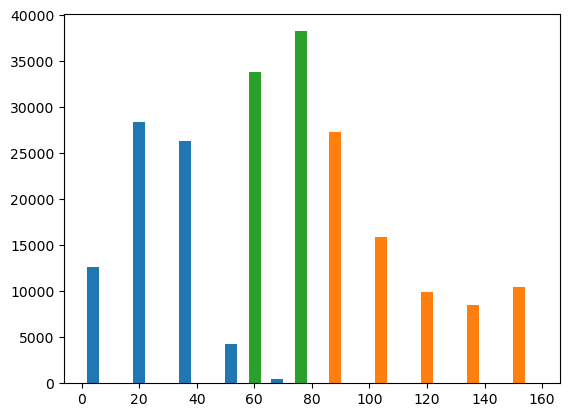

In [44]:
pcd = np.load("dataset1.npy")
print(pcd.shape)

hist, bin_edges = np.histogram(pcd, bins=10)
plt.hist(pcd, bins=10)
plt.show()


(84588, 3)


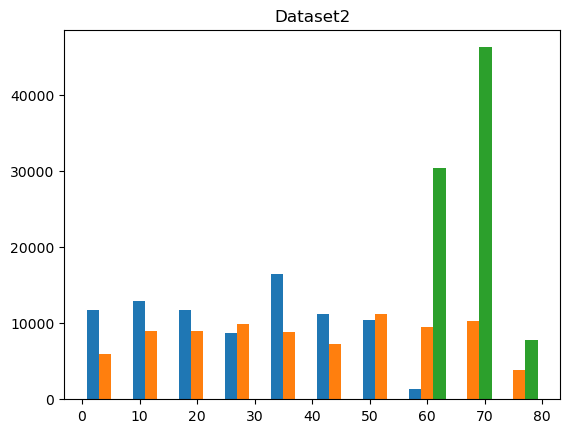

In [51]:
pcd2 = np.load("dataset2.npy")
print(pcd2.shape)

hist, bin_edges = np.histogram(pcd2)
plt.hist(pcd2, bins=10)
plt.title("Dataset2")
plt.show()

## Task 1 (3) - Remove ground plane

find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme

64.08659999992815
above ground shape (38239, 3)


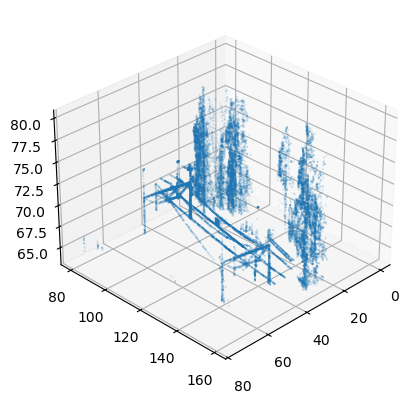

In [53]:
pcd = np.load("dataset1.npy")

est_ground_level = get_ground_level(pcd)
print(est_ground_level)

pcd_above_ground = pcd[pcd[:,2] > est_ground_level] 

print('above ground shape', pcd_above_ground.shape)

show_cloud(pcd_above_ground)

63.99839999973774
above ground shape (54122, 3)


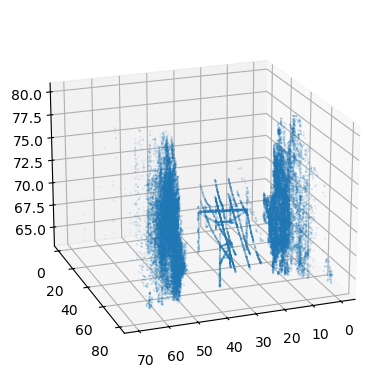

In [7]:
pcd2 = np.load("dataset2.npy")

est_ground_level2 = get_ground_level(pcd2)
print(est_ground_level2)

pcd2_above_ground = pcd2[pcd2[:,2] > est_ground_level2] 

print('above ground shape', pcd2_above_ground.shape)

show_cloud(pcd2_above_ground, elev = 20, azim = 70)

12


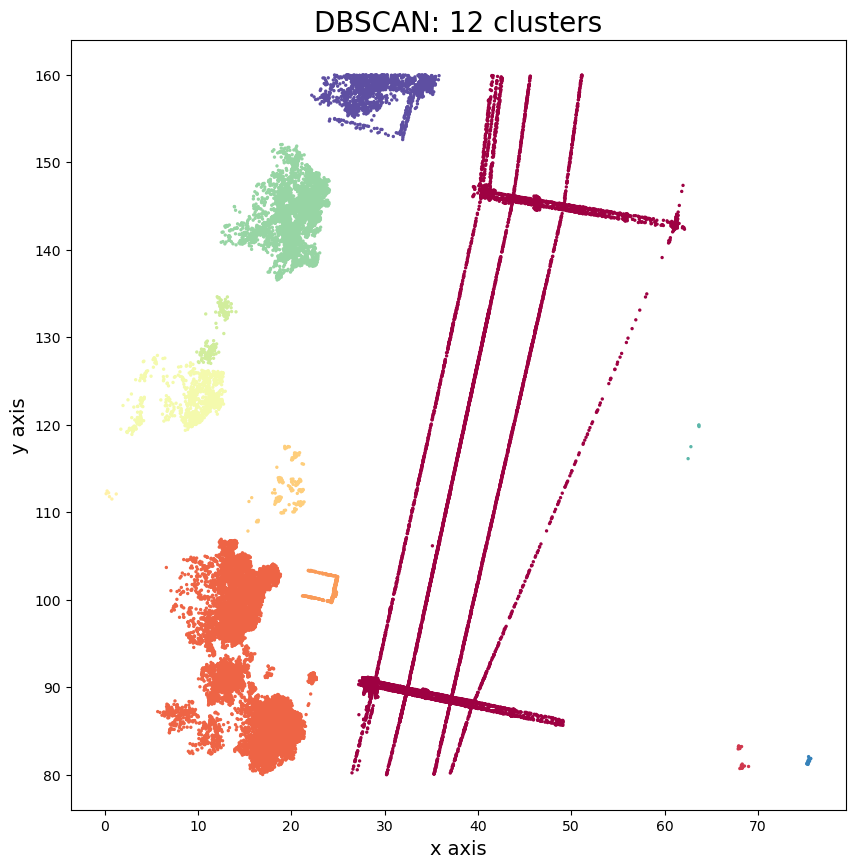

In [7]:
unoptimal_eps = 3
samples = 4
# min_samples=5
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=samples).fit(pcd_above_ground)

#%%
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]

print(clusters)
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0], 
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()

We know that foliage is going to be more or equal to a distance from the railway. I thought that clustering would be better without the height so that we can have a pretty tight radius for discrimination. The goal is that the radius is big enough so that single "low res" points for the catenary is not lost, and that the foliage is its own cluster(s). When looking at the plots below from the loop, i thought that 2/2.25 is a good value for eps, as that is the lowest value before we are starting to loose low res points.

eps = 1.0, clusters = 23


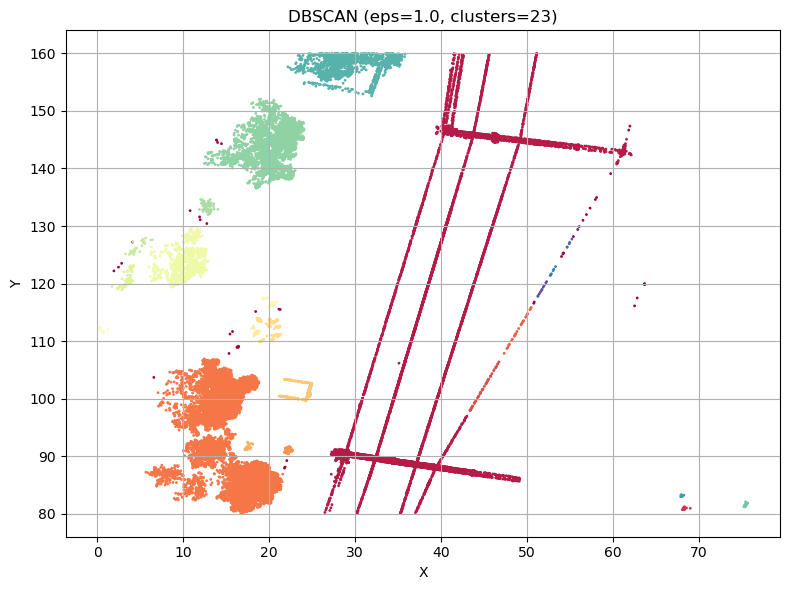

eps = 1.25, clusters = 18


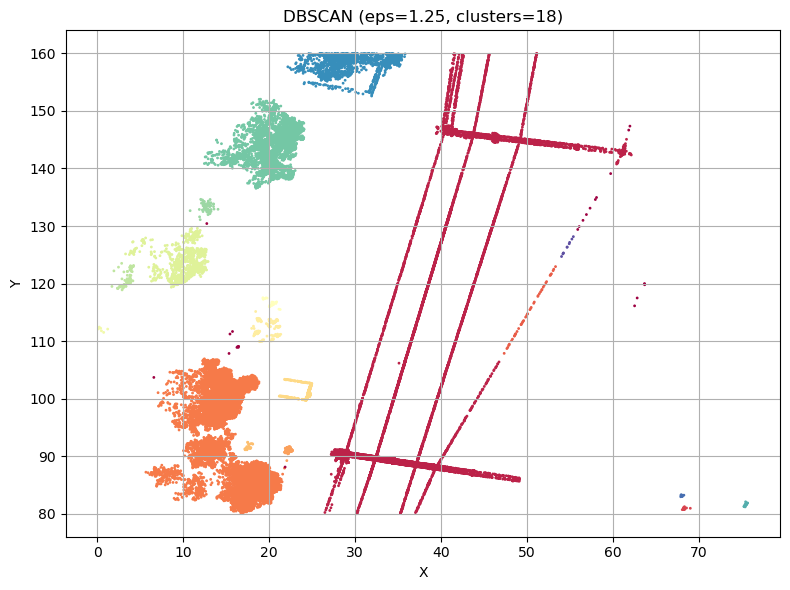

KeyboardInterrupt: 

In [8]:
from sklearn.cluster import DBSCAN

def test_dbscan(points, eps_values, min_samples=5):
    for eps in eps_values:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
        labels = clustering.labels_
        clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        print(f"eps = {eps}, clusters = {clusters}")

        plt.figure(figsize=(8, 6))
        plt.scatter(points[:, 0], points[:, 1], c=labels, s=1, cmap='Spectral')
        plt.title(f'DBSCAN (eps={eps}, clusters={clusters})')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        if clusters < 4: break

points = pcd_above_ground[:, :2]

eps_range = np.arange(1,5,0.25)
test_dbscan(points, eps_range)


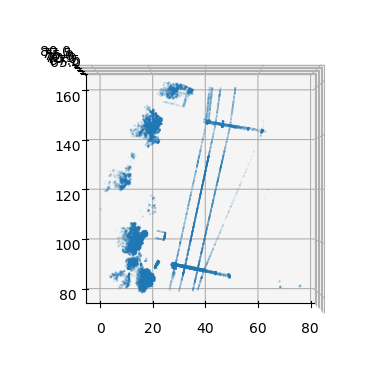

In [9]:
show_cloud(pcd_above_ground,elev=90,azim=-90)

### With 2d clustering

With 2d clustering. Clusters: 10, EPS: 2.25


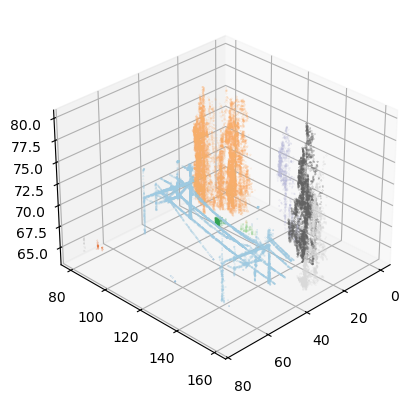

Without 2d clustering. Clusters: 10, EPS: 2.25


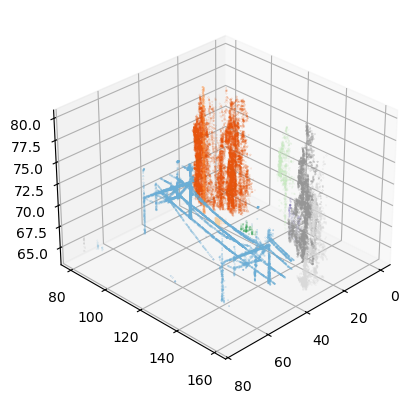

In [56]:
points = pcd_above_ground[:, :2]
eps = 2.25

clustering = DBSCAN(eps=eps, min_samples=5).fit(points)
labels = clustering.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"With 2d clustering. Clusters: {clusters}, EPS: {eps}")
show_cluster_cloud(pcd_above_ground, labels)

print(f"Without 2d clustering. Clusters: {clusters}, EPS: {eps}")
clustering2 = DBSCAN(eps=eps, min_samples=5).fit(pcd_above_ground)
labels2 = clustering2.labels_
clusters = len(set(labels2)) - (1 if -1 in labels2 else 0)
show_cluster_cloud(pcd_above_ground, labels2)

With 2d clustering. Clusters: 12, EPS: 2.25


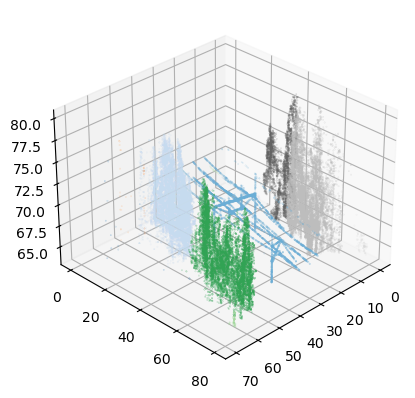

Without 2d clustering. Clusters: 12, EPS: 2.25


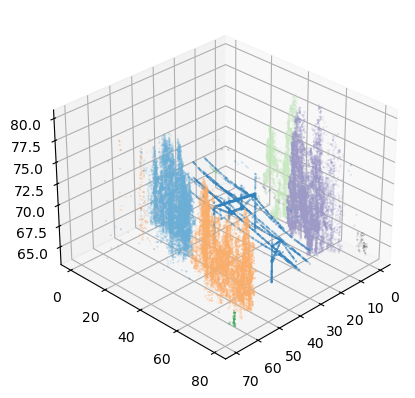

In [10]:
points = pcd2_above_ground[:, :2]
eps = 2.25


clustering = DBSCAN(eps=eps, min_samples=5).fit(points)
labels = clustering.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"With 2d clustering. Clusters: {clusters}, EPS: {eps}")
show_cluster_cloud(pcd2_above_ground, labels)

print(f"Without 2d clustering. Clusters: {clusters}, EPS: {eps}")
clustering2 = DBSCAN(eps=eps, min_samples=5).fit(pcd2_above_ground)
labels2 = clustering2.labels_
clusters = len(set(labels2)) - (1 if -1 in labels2 else 0)
show_cluster_cloud(pcd2_above_ground, labels2)


## Task 3 

Find the largest cluster, since that should be the catenary, 
beware of the noise cluster.

Use the x,y span for the clusters to find the largest cluster

For both the datasets
Report min(x), min(y), max(x), max(y) for the catenary cluster in the Readme of your github project
Add the plot of the catenary cluster to the readme

### Comment

Measure the area of clusters, biggest = catenary -> get the points.
Did not manage to extract the cables only. So i opted for just removing 5.5 meters from the ground plane.

EDIT: We could not extract 5.5 meters, altough about 2.5 until cables were cut out.



In [67]:
def get_largest_cluster(points, labels):

    # take out the largest cluster

    cluster_dict = {}
    # save points to cluster labels
    for i, label in enumerate(labels):
        if label == -1:
            continue
        if label not in cluster_dict:
            cluster_dict[label] = [points[i]]
        else:
            cluster_dict[label].append(points[i])

    for label in cluster_dict:
        cluster_dict[label] = np.array(cluster_dict[label])

    # take out the largest cluster by span in 2d
    max_span = 0
    best_label = None
    boundry_values = {}
    for label, points in cluster_dict.items():

        x_min, x_max = points[:, 0].min(), points[:, 0].max()
        y_min, y_max = points[:, 1].min(), points[:, 1].max()
        z_min, z_max = points[:, 2].min(), points[:, 2].max()
        
        catenary_span = ((x_max - x_min) * (y_max - y_min))

        x_span = points[:, 0].ptp()
        y_span = points[:, 1].ptp()
        z_span = points[:, 2].ptp()

        if catenary_span > max_span:
            max_span = catenary_span
            best_label = label
            boundry_values = {
                'x_min': x_min, 'x_max': x_max,
                'y_min': y_min, 'y_max': y_max,
                'z_min': z_min, 'z_max': z_max,
                'x_span': x_span, 'y_span': y_span, 'z_span': z_span 
            }
    
    return cluster_dict[best_label], boundry_values


x_min: 26.497999999992317
x_max: 62.14000000001397
y_min: 80.01900000032037
y_max: 159.95999999996275
z_min: 64.096
z_max: 73.64500000000004
x_span: 35.64200000002165
y_span: 79.94099999964237
z_span: 9.549000000000035


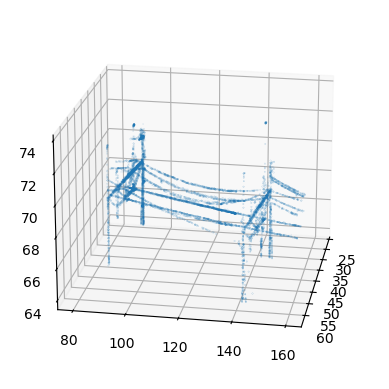

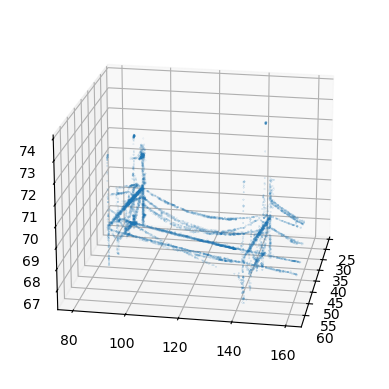

In [111]:
pcd = np.load("dataset1.npy")
est_ground_level = get_ground_level(pcd)
pcd_above_ground = pcd[pcd[:,2] > est_ground_level]

eps = 2.25

clustering = DBSCAN(eps=eps, min_samples=5).fit(pcd_above_ground)
labels = clustering.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)

pcd_cluster, boundry1 = get_largest_cluster(pcd_above_ground, labels)

pcd_catenary = pcd_cluster[pcd_cluster[:,2] > pcd_cluster[:,2].min() + 2.5]

for key, value in boundry1.items():
    print(f"{key}: {value}")
show_cloud(pcd_cluster, elev=20, azim=10)
show_cloud(pcd_catenary, elev=20, azim=10)


x_min: 10.179000000003725
x_max: 37.00700000001234
y_min: 0.04299999959766865
y_max: 79.97599999979138
z_min: 64.0
z_max: 70.911
x_span: 26.828000000008615
y_span: 79.93300000019372
z_span: 6.911000000000001


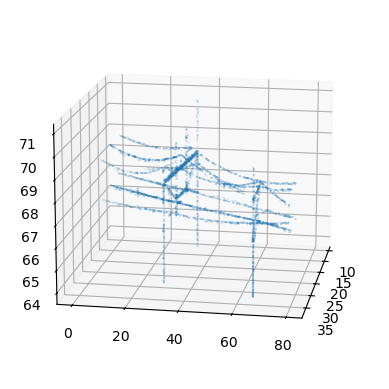

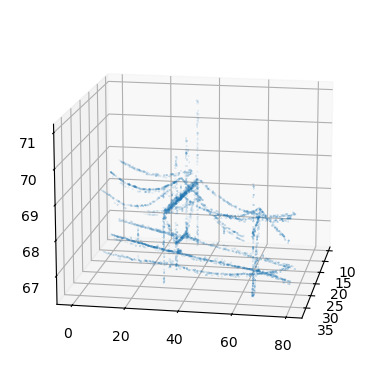

In [112]:
pcd2 = np.load("dataset2.npy")
est_ground_level = get_ground_level(pcd2)
pcd2_above_ground = pcd2[pcd2[:,2] > est_ground_level]
eps = 2.25

clustering2 = DBSCAN(eps=eps, min_samples=5).fit(pcd2_above_ground)
labels2 = clustering2.labels_
clusters2 = len(set(labels2)) - (1 if -1 in labels2 else 0)

pcd2_cluster, boundry2 = get_largest_cluster(pcd2_above_ground, labels2)
pcd2_catenary = pcd2_cluster[pcd2_cluster[:,2] > pcd2_cluster[:,2].min() + 2.5]
for key, value in boundry2.items():
    print(f"{key}: {value}")

show_cloud(pcd2_cluster, elev=15, azim=10)
show_cloud(pcd2_catenary, elev=15, azim=10)


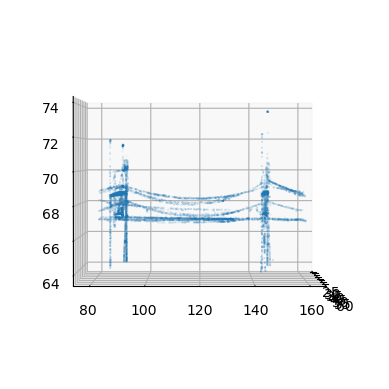

In [35]:
tjena, boundry = get_largest_cluster(pcd_above_ground,labels)

show_cloud(tjena,azim=0,elev=1)